<a href="https://colab.research.google.com/github/GiaLop/Python-Projects/blob/main/credit_card_customer_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# defininf random seed
RANDOM_SEED = 42

# defining cvs file path
path = '/content/drive/MyDrive/Profession AI/credit_card_customers.csv'

# creating dataframe
df = pd.read_csv(path)

# having some info on df
df.info()
df.isna().sum()
print('------------------------------------------------')

# replacing the only NaN value with feature's median
cl_median = round(df['CREDIT_LIMIT'].median(),2)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(cl_median)

# taking a close look to feature's NaN distribution
df['MINIMUM_PAYMENTS'].min()
df['MINIMUM_PAYMENTS'].max()

# replacing NaN values with feature median
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].median(), 2))

# checking some more NaN values
print('Sum of NaN values:\n')
print(df.isna().sum())
print('------------------------------------------------')
display(df.describe())
print('------------------------------------------------')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906629,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792353,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.340000,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX    

In [ ]:
#creating a df copy
df2 = df.copy()

# dropping cust_id
df2 = df2.drop('CUST_ID', axis=1)

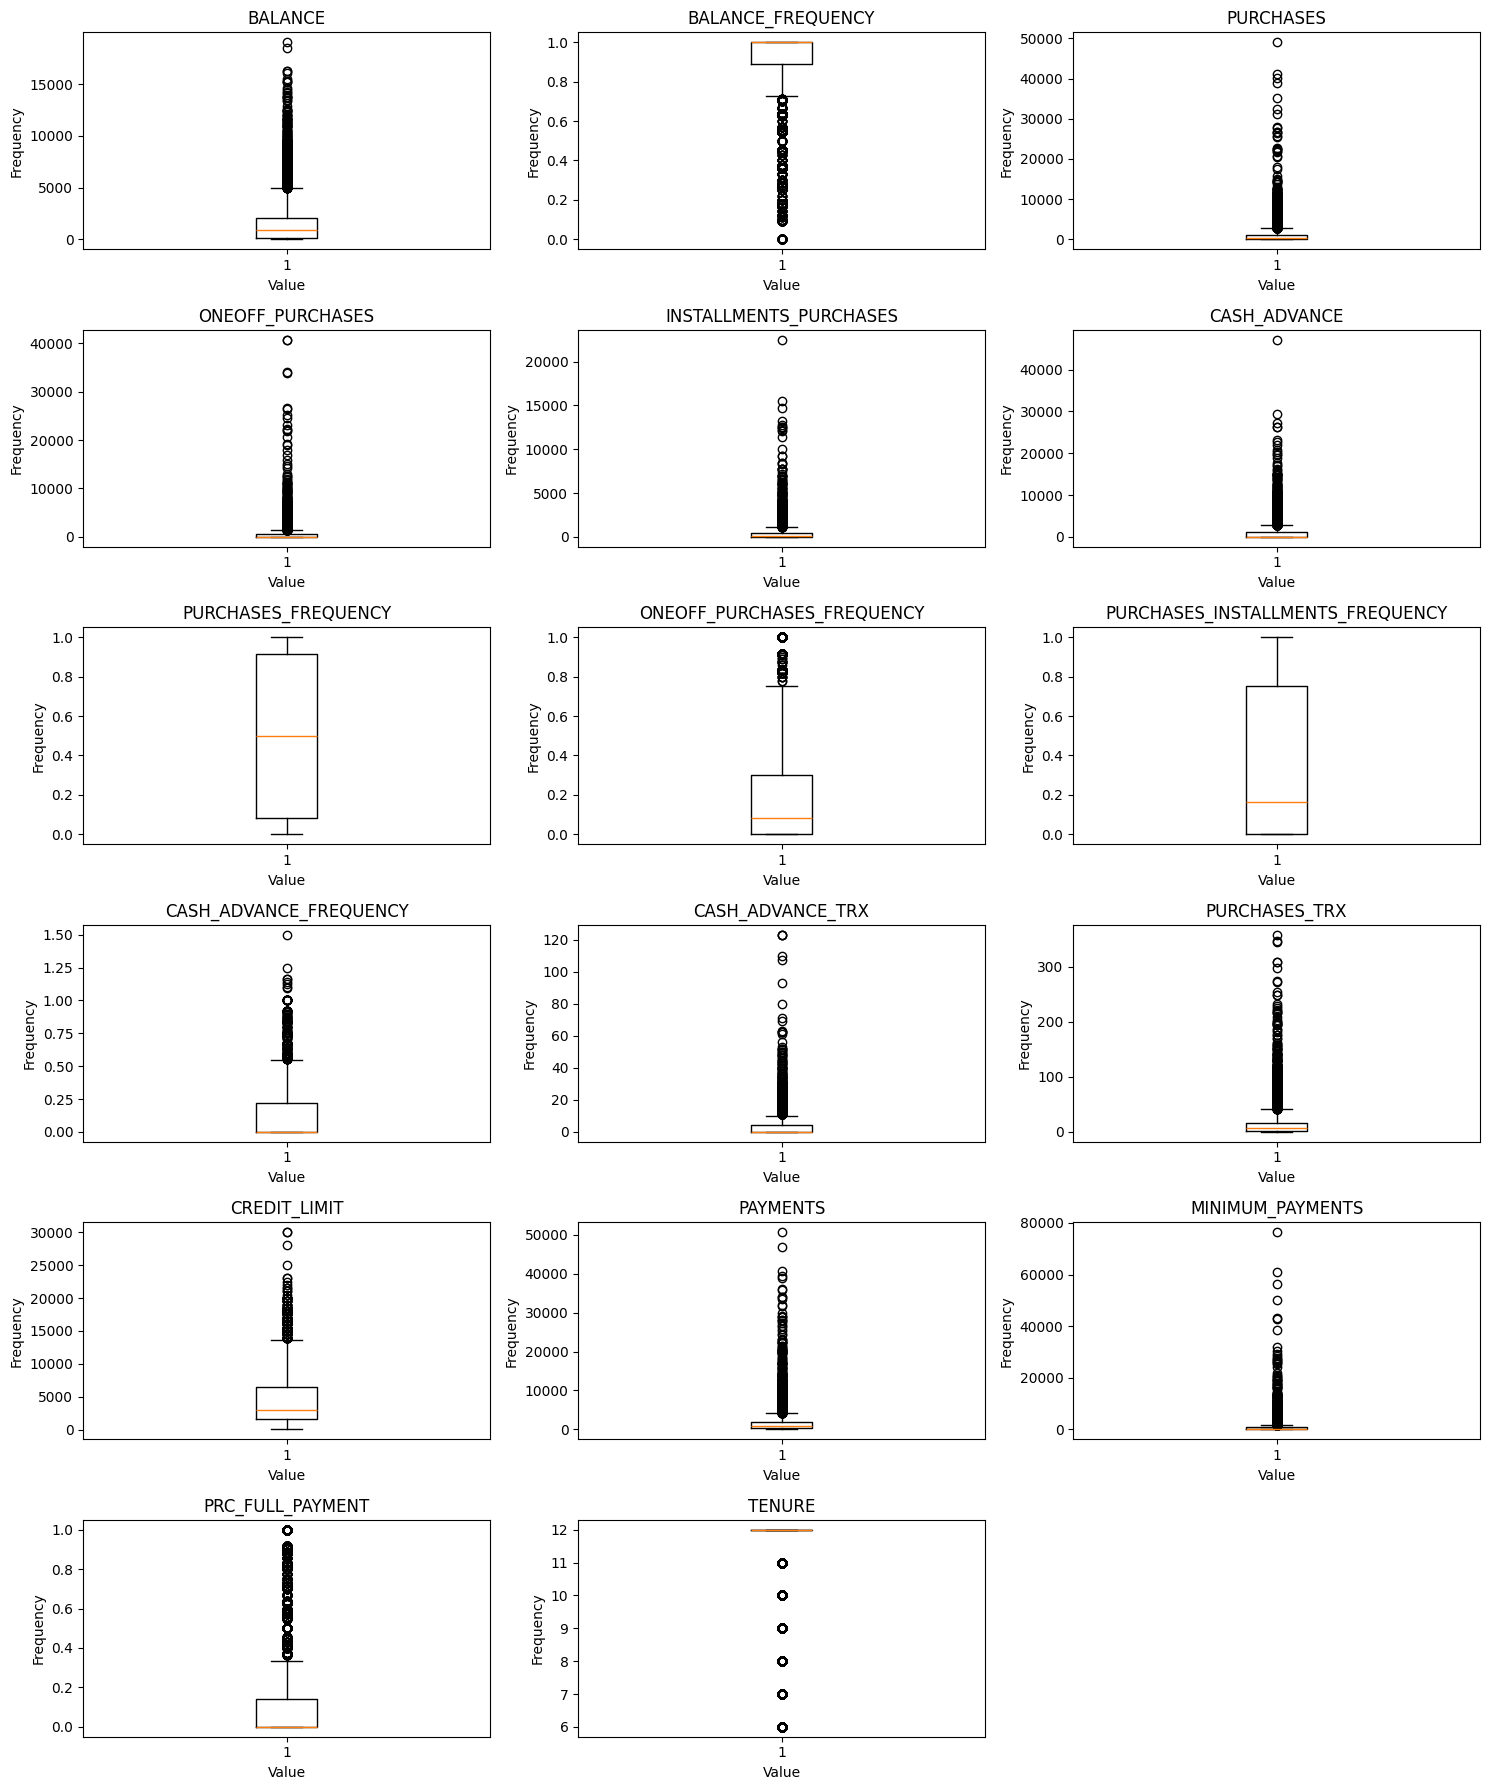

In [ ]:
# plotting datas distributions

# selecting columns
num_cols = df2.columns

# defining n_features and n_cols to calculate n_rows for final structure
n_features = len(num_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# defining features misures
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))

# transforming axs in 1D array
axs = axs.flatten()

# plotting all feature in each fig, axs
for i, col in enumerate(num_cols):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel('Value')


# deleting fig,axis if are more than feature
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# fitting params so we can read easily figs and labels
fig.tight_layout()
plt.show()

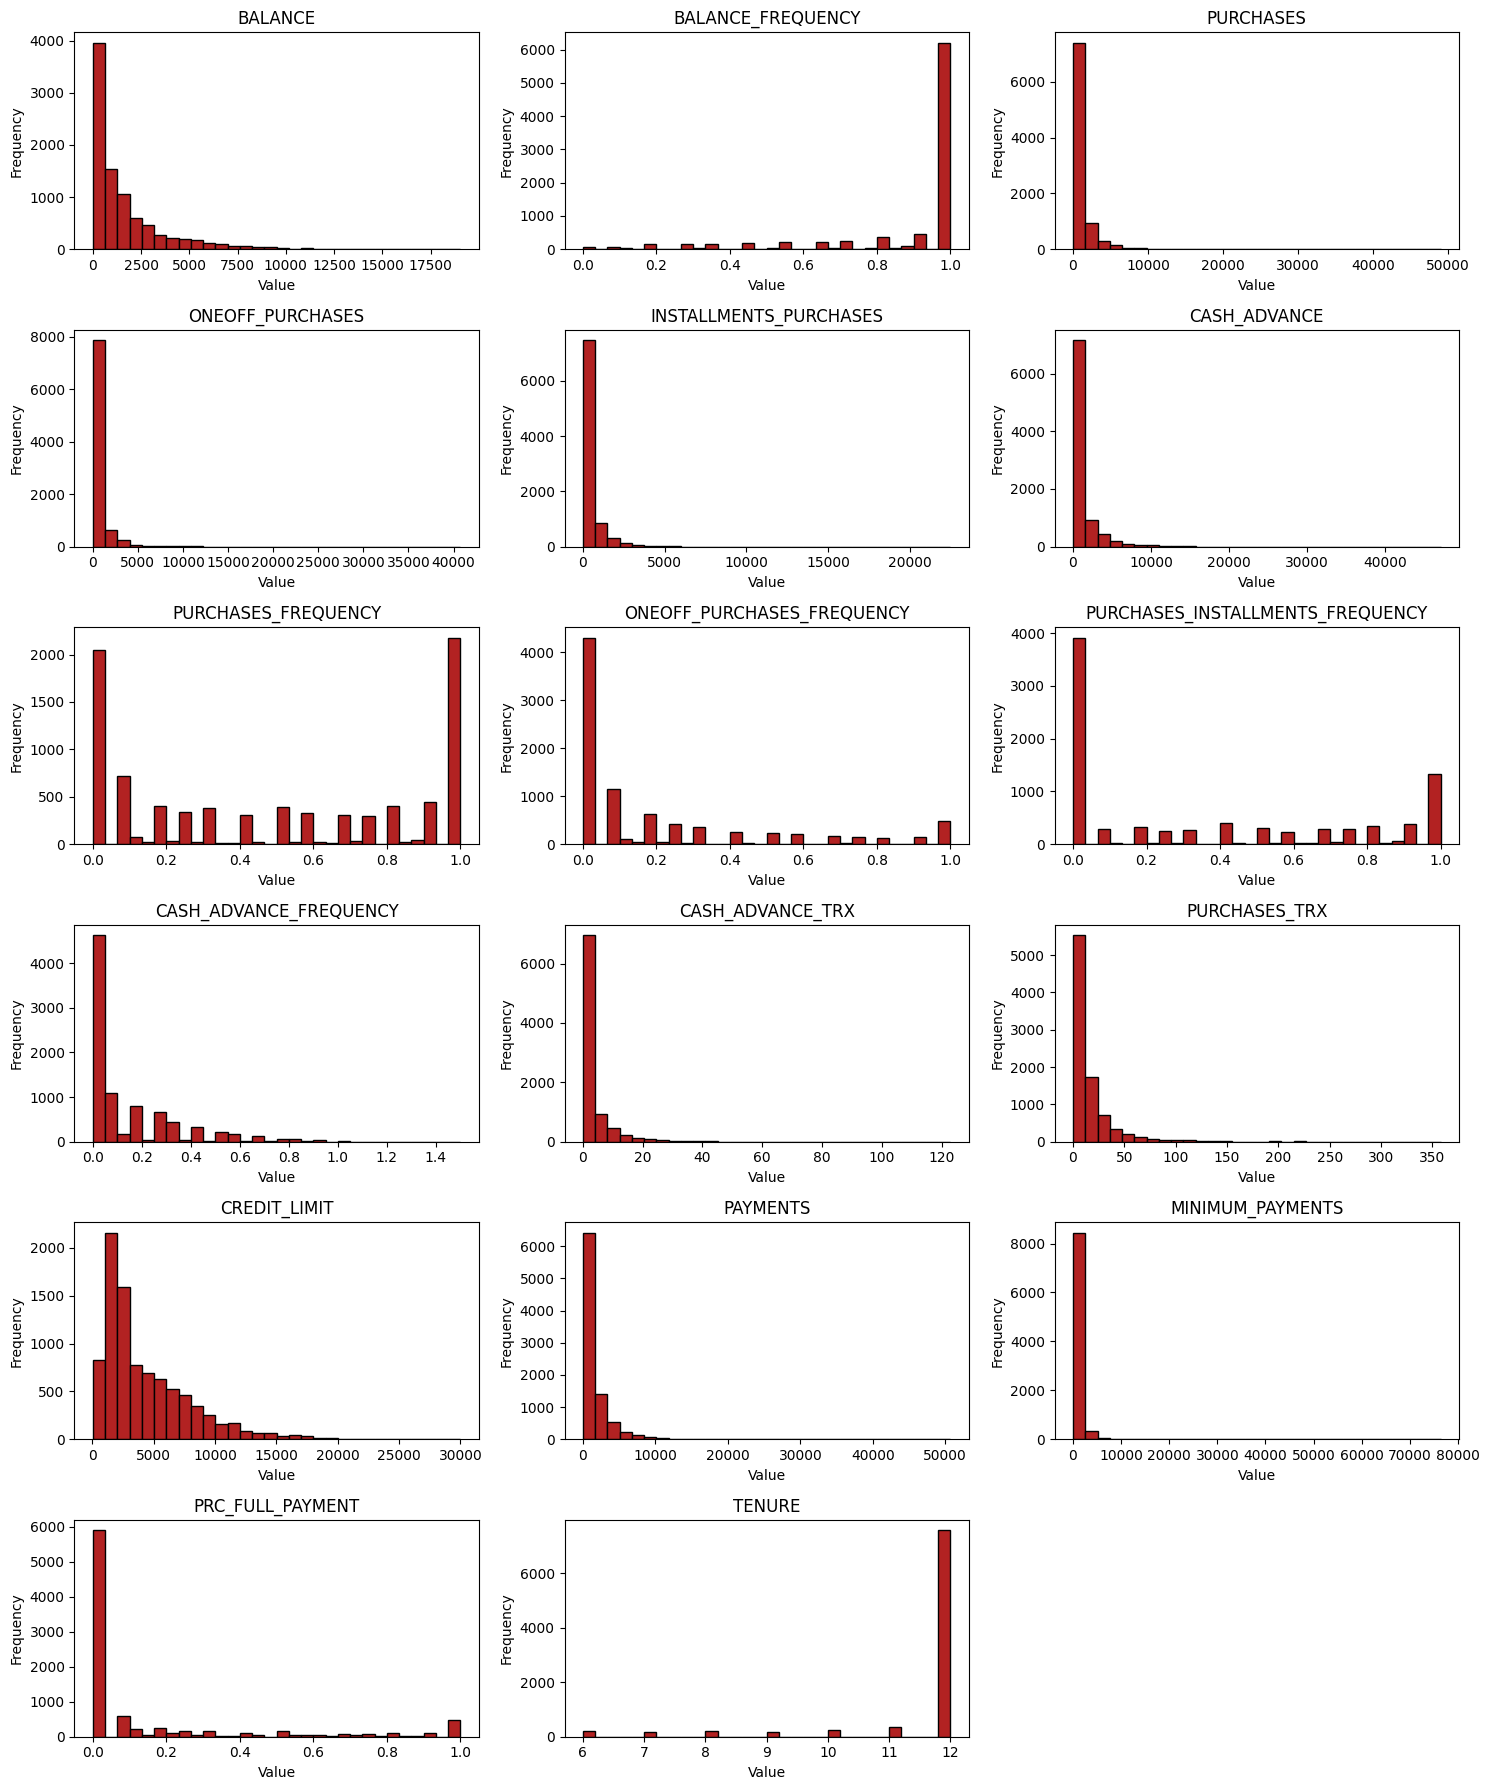

In [ ]:
# doing the same as before to plot features hist() to see datas distribution
num_cols = df2.columns

n_features = len(num_cols)
n_cols=3
n_rows = (n_features + n_cols -1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))

axs = axs.flatten()

for i, col in enumerate(num_cols):
  axs[i].hist(df2[col], bins=30, color='#b22222', edgecolor='black')
  axs[i].set_title(col)
  axs[i].set_ylabel('Frequency')
  axs[i].set_xlabel('Value')

for j in range(i+1, len(axs)):
  axs[j].axis('off')

fig.tight_layout()
plt.show()


# I decided to use Robust Scaler instead of Standard since datas are mostly skewed

In [ ]:
# scaling features for cluster analysis
X = df2[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 'TENURE']]

# evoking Robust Scaler to scale datas
rs = RobustScaler()
X_rob = rs.fit_transform(X)

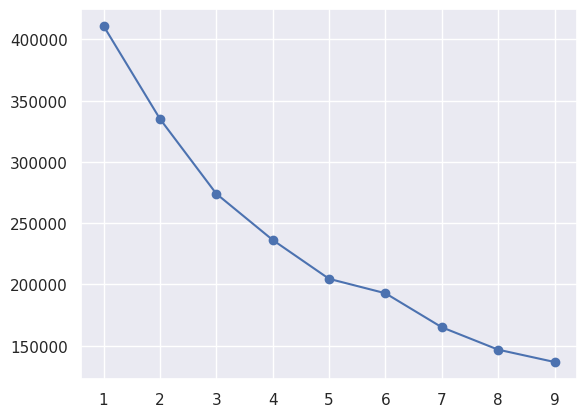

In [ ]:
# plotting elobow graph

# initializing empty dict
sse={}

# starting a loop with a range 1 to 9 k
for k in range(1,10):
  # calling Kmeans, calculate k in asch loop
  km = KMeans(n_clusters=k, init='k-means++', random_state=RANDOM_SEED).fit(X_rob)
  # saving in dict k as a key and its inertia as a value
  sse[k] = km.inertia_

# setting seaborn theme
sns.set_theme()

# plotting ks on x axis and its inertia on y axis
plt.plot(sse.keys(), sse.values(), marker='o')
plt.show()

In [ ]:
# calculating silhoutte score

# calling KMeans one, choosen 3 as k
km = KMeans(n_clusters=3, init='k-means++', random_state=RANDOM_SEED).fit(X_rob)

# defning cluster_label fitting scaled X
cluster_label = km.fit_predict(X_rob)

# calling and printing silhouette
sl = round(silhouette_score(X_rob, cluster_label),2)
print(f"Silhouette Score is: {sl}")

Silhouette Score is: 0.66


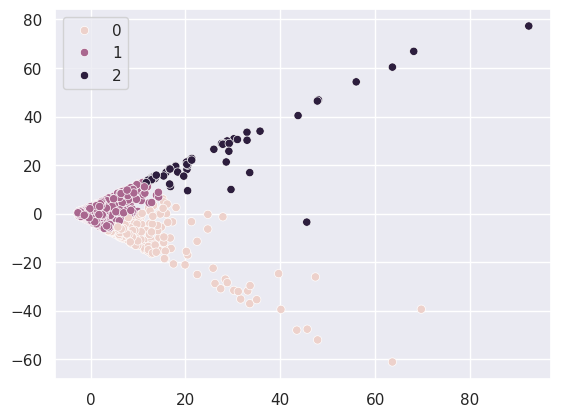

In [ ]:
# decomposing features with PCA

# calling PCA
pca = PCA(n_components=2)

# fitting scaled X to PCA
X_pca = pca.fit_transform(X_rob)

# calling KMAeans with scaled and decomposed X
km = KMeans(n_clusters=3, init='k-means++', random_state=RANDOM_SEED).fit(X_pca)

# predicting values
y_pred = km.predict(X_pca)

# plotting values with clusters
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred)
plt.show()

In [ ]:
# adding clusters Serie to the Data Frame with predicted values
df2['clusters'] = y_pred

# taking a look on clusters values distribuiton
clusters_count = df2['clusters'].value_counts()
display(clusters_count)

,count
clusters,
1,8604
0,286
2,60


In [ ]:
# adding labels to clusters
CL = {0: 'Potencial Segment', 1: 'Mass-market Clients', 2: 'Premium Clients'}

# using vectorize to use a function on y_pred vector
vfunc = np.vectorize(lambda x: CL[x])
cluster_labels = vfunc(y_pred)

# adding clusters labels instead of the numeric clusters
df2['clusters'] = cluster_labels

# grouping df copy by clusters
clusters = df2.groupby('clusters')

# calculating mean for each Series
clusters_mean = round(clusters.mean(),2)
display(clusters_mean)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
Mass-market Clients,1478.99,0.87,731.28,394.95,336.65,957.60,0.48,0.19,0.35,0.14,3.23,12.35,4312.03,1466.19,669.11,0.15,11.50
Potencial Segment,3505.81,0.97,9093.19,6589.15,2504.04,1531.81,0.91,0.75,0.68,0.10,3.72,84.14,9921.15,9608.35,1630.74,0.35,11.92
Premium Clients,4569.73,0.99,1434.47,328.03,1106.43,1393.10,0.50,0.07,0.46,0.13,3.98,21.98,4761.67,2475.90,22307.65,0.00,11.92


In [ ]:
# defining Seires for each cluster
Mass_market_Clients = round(df2[df2['clusters'] == 'Mass-market Clients'],2)
Premium_Clients = round(df2[df2['clusters'] == 'Premium Clients'],2)
Potencial_Segment = round(df2[df2['clusters'] == 'Potencial Segment'],2)

In [ ]:
# Medium Spending Cluster's Stats
mn_spending = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']

spending_stats_0 = round(Mass_market_Clients[mn_spending].agg(['mean', 'std', 'median']),2)
spending_stats_1 = round(Premium_Clients[mn_spending].agg(['mean', 'std', 'median']),2)
spending_stats_2 = round(Potencial_Segment[mn_spending].agg(['mean', 'std', 'median']),2)
print("Spending Stats Mass-market Clients:\n")
display(spending_stats_0)
print("\n Spending Stats Premium Clients:\n")
display(spending_stats_1)
print("\n Spending Stats Potencial Segment: \n")
display(spending_stats_2)

Spending Stats Mass-market Clients:



,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
mean,1478.99,394.95,336.65
std,1960.11,707.02,582.59
median,828.76,16.25,76.97



 Spending Stats Premium Clients:



,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
mean,4569.73,328.03,1106.43
std,3469.23,1323.51,2421.00
median,3487.10,0.00,221.66



 Spending Stats Potencial Segment: 



,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
mean,3505.81,6589.15,2504.04
std,3417.33,5812.34,3091.30
median,2456.05,4938.62,1582.84


In [ ]:
# Payments Habits Cluster's Stats

def prc_m_p(cluster):
  cluster = cluster.copy()
  cluster['PRC_MINIMUM_PAYMENTS'] = round(cluster['PAYMENTS'] / cluster['MINIMUM_PAYMENTS'],2)
  cluster['PRC_MINIMUM_PAYMENTS']= cluster['PRC_MINIMUM_PAYMENTS'].replace([np.inf, -np.inf], np.nan).fillna(0)
  return cluster[['PRC_MINIMUM_PAYMENTS', 'PAYMENTS']]



payments_habits_pc = prc_m_p(Premium_Clients)
payments_habits_mmc = prc_m_p(Mass_market_Clients)
payments_habits_ps = prc_m_p(Potencial_Segment)

print('Payments Habits Premium CLients:\n')
display(round(payments_habits_pc.describe(), 2))
print('\nPayments Habits Mass-market Clients:\n')
display(round(payments_habits_mmc.describe(), 2))
print('\nPayments Habits Potencial Segment:\n')
display(round(payments_habits_ps.describe(), 2))

Payments Habits Premium CLients:



,PRC_MINIMUM_PAYMENTS,PAYMENTS
count,60.00,60.00
mean,0.14,2475.90
std,0.26,4501.27
min,0.00,46.97
25%,0.01,204.54
50%,0.03,523.44
75%,0.10,3209.12
max,1.24,23018.58



Payments Habits Mass-market Clients:



,PRC_MINIMUM_PAYMENTS,PAYMENTS
count,8604.00,8604.00
mean,8.77,1466.19
std,118.45,2067.03
min,0.00,0.00
25%,0.91,372.04
50%,1.97,811.58
75%,5.78,1746.93
max,6892.73,34107.07



Payments Habits Potencial Segment:



,PRC_MINIMUM_PAYMENTS,PAYMENTS
count,286.00,286.00
mean,17.93,9608.35
std,16.88,8093.44
min,0.00,0.00
25%,3.90,4838.78
50%,11.86,6849.28
75%,29.94,11120.65
max,93.72,50721.48


In [ ]:
# Purchases Frequency

def pur_fre(cluster):
  return cluster[['CASH_ADVANCE', 'PURCHASES_FREQUENCY']]

purchases_frequency_pc = pur_fre(Premium_Clients)
purchases_frequency_mmc = pur_fre(Mass_market_Clients)
purchases_frequency_ps = pur_fre(Potencial_Segment)

print('Purchases Frequency Premium CLients:\n')
display(round(purchases_frequency_pc.describe()))
print('\nPurchases Frequency Mass-market Clients:\n')
display(round(purchases_frequency_mmc.describe()))
print('\nPurchases Frequency Potencial Segment:\n')
display(round(purchases_frequency_ps.describe()))

Purchases Frequency Premium CLients:



,CASH_ADVANCE,PURCHASES_FREQUENCY
count,60.0,60.0
mean,1393.0,1.0
std,3290.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,127.0,1.0
75%,1134.0,1.0
max,20713.0,1.0



Purchases Frequency Mass-market Clients:



,CASH_ADVANCE,PURCHASES_FREQUENCY
count,8604.0,8604.0
mean,958.0,0.0
std,1927.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1121.0,1.0
max,26194.0,1.0



Purchases Frequency Potencial Segment:



,CASH_ADVANCE,PURCHASES_FREQUENCY
count,286.0,286.0
mean,1532.0,1.0
std,4838.0,0.0
min,0.0,0.0
25%,0.0,1.0
50%,0.0,1.0
75%,454.0,1.0
max,47137.0,1.0


# **CLUSTER'S STRATEGIES**
## After data cleaning, the best result shows 3 distinct clusters:
<br>

###**Mass-Market clients:**
- **Insight:**
  - 8604 clients: It's the largest cluster, with low balance (1478.99), low average payments (1466.19).

  - Modest purchases, especially with small installments (394.95) and rare “one-off” expenses (336.65).

- **Consideration:** Standard customers, with limited spending capacity, tendency to continuously defer payments.

- ***Strategy:***
  - Promotions that encourage installment payments (flexible promotional rate plans).
  - Cross-selling on reduced-fee cards or loyalty programs with cashback on small expenses.
  - Financial Education: Suggest products that help you manage debt better.

<br>

**In conclusion:**

in this cluster we look for volumes, loyalization, offer simple product

<br>

### **Potencial segment:**
- **Insight:**
  -  286 clients: It's an intermediate group with very high payments (9608.35) and higher balance(3505.81).
  - high share of minimum payments median 11.86
  - High average on purchases “one-offs” (6589.15) and instalments (2504.04)

- **Consideration:** High potential customers, large spending capacity, but they couldn't be always creditworthy. <br>
They can be both profitable and risky (because they accumulate debt).

- ***Strategy:***
  - Encourage full payments with promotions (rate discounts if paid in full).

  - Propose advanced financial services (additional credit lines, personal loans, debt consolidation).

  - Exclusive offers on “premium” purchases (travel, luxury goods), colud rise one-off purchases.

<br>

**In conclusion:**

in this cluster we can maximize profits but it could be risky. We could offer financial services, but check carefully.

<br>

###**Premium clients:**
- **Insight:**
  - 60 clients: it is the smaller group, but with most profitable stats.

  - highest average balance (4569.73).

  - They almost always pay much more than the minimum (average PRC = 0.14, therefore irrelevant minimum compared to the real payment).

  - They make few one-off purchases, thy prefer most installments purchases

- **Consideration:** Solid customers, reliable in payments

- ***Strategies:***

  - Offer premium benefits (gold/black cards, exclusive loyalty programs, travel insurance).

  - Encourage frequent use of the card to increase commissions (e.g. cashback on recurring expenses).

<br>

**In cocnlusion:**

this cluster's clients are the best for our business, so we should take care of them (they are reliable and spend a lot).

